<a href="https://colab.research.google.com/github/yjyjyjcho/graduation-paper_PNU/blob/master/%EC%B5%9C%EC%A2%85%2B1%EB%8B%A8%EA%B3%84_%EB%B3%B4%EC%A1%B0_%EC%8B%A4%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
## library import ##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import gc # for deleting unused variables


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
experiment_result = pd.read_csv("train.csv", sep = '\t')
## data import ##
experiment_result = pd.read_csv("train.csv")
experiment_result = experiment_result.fillna('no') ## 결측치 -> no 로 처리 
experiment_result.head()
experiment_result['feedrate'] = experiment_result['feedrate'].astype(int) # object형을 int로 변환
experiment_01 = pd.read_csv("experiment_01.csv")
experiment_result.astype({'feedrate':'int'}).dtypes

#########creating data frame#################

frames = list()
experiment_result.astype({'feedrate':'int'}).dtypes
#load files
for i in range(1,19):
    exp_number = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("experiment_{}.csv".format(exp_number))

#load each experiment result
    row = experiment_result[experiment_result['No'] == i] #행번호 붙이기

#add experiment settings to features (feedrate, clamp pressure 데이터 붙이기)
    frame['feedrate']=row.iloc[0]['feedrate'] 
    frame.astype({'feedrate':'int'}).dtypes
    frame['clamp_pressure']=row.iloc[0]['clamp_pressure']
    
# Having label as 'tool_conidtion'
    
    frame['label'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0 #마모 : 1, 미마모 : 0 라벨링 -> like 원핫인코딩
    frames.append(frame)


#encode 'Machining_Process'label to number #공작과정 라벨링
 
#split df into train/test data

#fit  & predict

df = pd.concat(frames, ignore_index = True)
df.head()
df.astype({'feedrate':'int'}).dtypes
df['feedrate'].astype('float')
pd.to_numeric(df['feedrate'])
## building ML model ##

X=df.drop(columns=['label','X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_OutputCurrent', 'S1_OutputVoltage',
       'S1_OutputPower', 'S1_SystemInertia', 'M1_CURRENT_PROGRAM_NUMBER',
       'M1_CURRENT_FEEDRATE', 'feedrate', 'clamp_pressure', 'Machining_Process' ],axis=1) #공작과정 삭제
Y=np.array(df['label'])
print('The dimension of X table is: ',X.shape,'\n')
print('The dimension of Y table is: ', Y.shape)

## train/test split ##
from sklearn.model_selection import train_test_split

#divided into testing and training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import gc # for deleting unused variables
%matplotlib inline

The dimension of X table is:  (25286, 9) 

The dimension of Y table is:  (25286,)


In [38]:

#LGBM #
%%time
LGBM = LGBMClassifier()
LGBM.fit(x_train,y_train)
import time
start = time.time()  # 시작 시간 저장
 
 


CPU times: user 385 ms, sys: 8.91 ms, total: 393 ms
Wall time: 394 ms


time : 0.02067255973815918
Trained on 18964 observations and scoring with 6322 test samples.
Accuracy: 0.9924
F1 Score: 0.9928
Area under ROC curve: 0.9923
AUC : 0.992


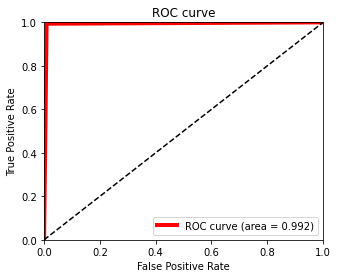

In [39]:
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
y_score = LGBM.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")